In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Setup
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Display settings
pd.set_option('display.max_columns', None)
sns.set(style='whitegrid')

# Load dataset
file_path = '/content/drive/MyDrive/AI6SaturdayLagosC9/netflix_titles.csv'  # Update path if needed
df = pd.read_csv(file_path, low_memory=False)


In [ ]:
# 🔍 Initial checks
print("Shape:", df.shape)
print("Columns:", df.columns.tolist())
df.head()


Shape: (8807, 12)
Columns: ['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added', 'release_year', 'rating', 'duration', 'listed_in', 'description']


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [ ]:

# Cleaning
# Convert date_added to datetime
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')


In [ ]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [ ]:
df.describe()

,date_added,release_year
count,8709,8807.000000
mean,2019-05-23 01:45:29.452290816,2014.180198
min,2008-01-01 00:00:00,1925.000000
25%,2018-04-20 00:00:00,2013.000000
50%,2019-07-12 00:00:00,2017.000000
75%,2020-08-26 00:00:00,2019.000000
max,2021-09-25 00:00:00,2021.000000
std,NaN,8.819312


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       8807 non-null   object        
 1   type          8807 non-null   object        
 2   title         8807 non-null   object        
 3   director      6173 non-null   object        
 4   cast          7982 non-null   object        
 5   country       7976 non-null   object        
 6   date_added    8709 non-null   datetime64[ns]
 7   release_year  8807 non-null   int64         
 8   rating        8803 non-null   object        
 9   duration      8804 non-null   object        
 10  listed_in     8807 non-null   object        
 11  description   8807 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(10)
memory usage: 825.8+ KB


In [ ]:
# Strip whitespace from string columns
str_cols = df.select_dtypes(include='object').columns
df[str_cols] = df[str_cols].apply(lambda x: x.str.strip())


In [ ]:

# Drop duplicates
df.drop_duplicates(inplace=True)


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       8807 non-null   object        
 1   type          8807 non-null   object        
 2   title         8807 non-null   object        
 3   director      6173 non-null   object        
 4   cast          7982 non-null   object        
 5   country       7976 non-null   object        
 6   date_added    8709 non-null   datetime64[ns]
 7   release_year  8807 non-null   int64         
 8   rating        8803 non-null   object        
 9   duration      8804 non-null   object        
 10  listed_in     8807 non-null   object        
 11  description   8807 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(10)
memory usage: 825.8+ KB


In [ ]:

# Check missing values
missing_summary = df.isnull().sum().sort_values(ascending=False)
print("Missing values:\n", missing_summary)


Missing values:
 director        2634
country          831
cast             825
date_added        98
rating             4
duration           3
show_id            0
type               0
title              0
release_year       0
listed_in          0
description        0
dtype: int64


In [ ]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [ ]:
# Handle missing values

# Drop rows with missing values in 'rating', 'duration', and 'date_added'
df.dropna(subset=['rating', 'duration', 'date_added'], inplace=True)


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8702 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       8702 non-null   object        
 1   type          8702 non-null   object        
 2   title         8702 non-null   object        
 3   director      6164 non-null   object        
 4   cast          7885 non-null   object        
 5   country       7876 non-null   object        
 6   date_added    8702 non-null   datetime64[ns]
 7   release_year  8702 non-null   int64         
 8   rating        8702 non-null   object        
 9   duration      8702 non-null   object        
 10  listed_in     8702 non-null   object        
 11  description   8702 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(10)
memory usage: 883.8+ KB


In [ ]:
# Fill missing values in 'director', 'country', and 'cast' with 'Unknown'
df[['director', 'country', 'cast']] = df[['director', 'country', 'cast']].fillna('Unknown')


In [ ]:
# Check missing values again to confirm
missing_summary_after_handling = df.isnull().sum().sort_values(ascending=False)
print("Missing values after handling:\n", missing_summary_after_handling)

Missing values after handling:
 show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8702 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       8702 non-null   object        
 1   type          8702 non-null   object        
 2   title         8702 non-null   object        
 3   director      8702 non-null   object        
 4   cast          8702 non-null   object        
 5   country       8702 non-null   object        
 6   date_added    8702 non-null   datetime64[ns]
 7   release_year  8702 non-null   int64         
 8   rating        8702 non-null   object        
 9   duration      8702 non-null   object        
 10  listed_in     8702 non-null   object        
 11  description   8702 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(10)
memory usage: 883.8+ KB


In [ ]:
df.head(20)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,Unknown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Unknown,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,Unknown,Unknown,Unknown,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,Unknown,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
5,s6,TV Show,Midnight Mass,Mike Flanagan,"Kate Siegel, Zach Gilford, Hamish Linklater, H...",Unknown,2021-09-24,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",The arrival of a charismatic young priest brin...
6,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",Unknown,2021-09-24,2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...",2021-09-24,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s..."
8,s9,TV Show,The Great British Baking Show,Andy Devonshire,"Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...",United Kingdom,2021-09-24,2021,TV-14,9 Seasons,"British TV Shows, Reality TV",A talented batch of amateur bakers face off in...
9,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,2021-09-24,2021,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...


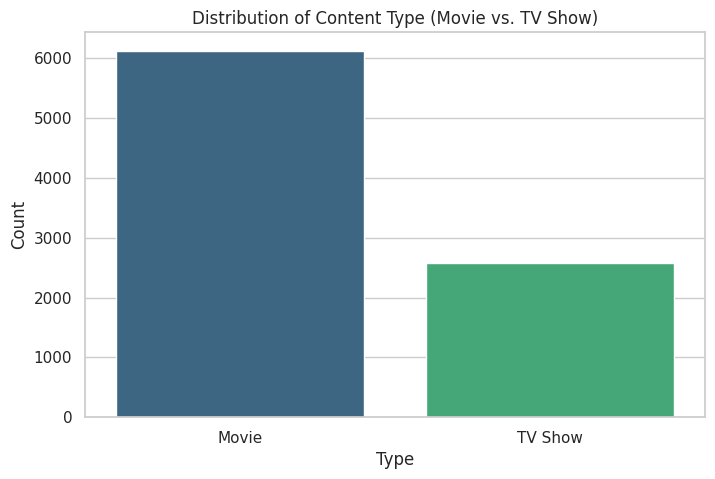

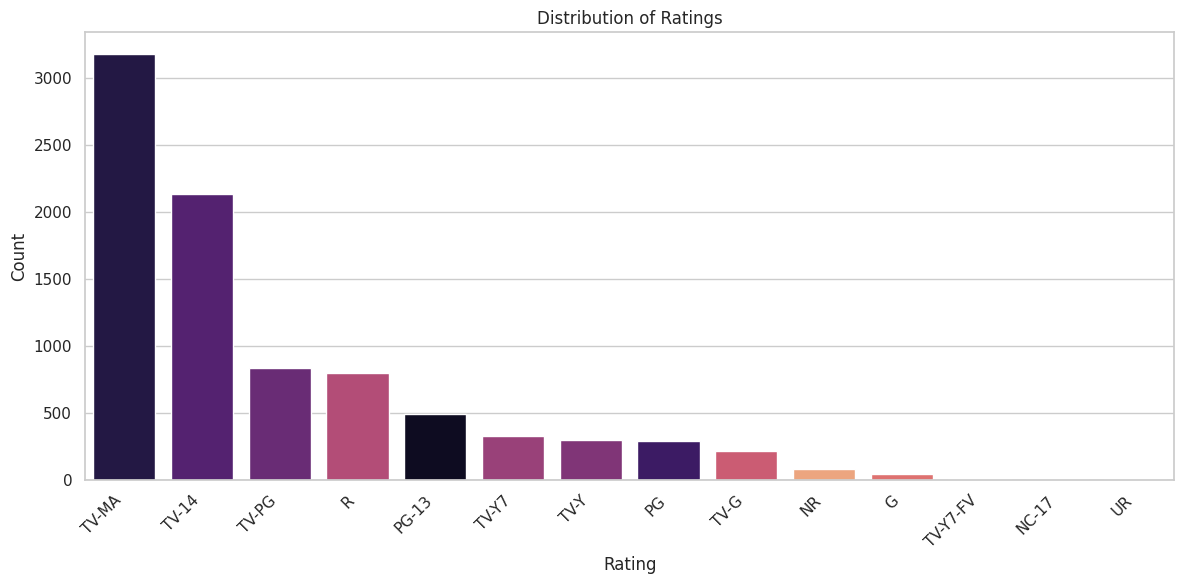

In [ ]:
# Analyze Categorical Variables

# Distribution of 'type'
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='type', palette='viridis', hue='type', legend=False)
plt.title('Distribution of Content Type (Movie vs. TV Show)')
plt.xlabel('Type')
plt.ylabel('Count')
plt.show()

# Distribution of 'rating'
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='rating', order=df['rating'].value_counts().index, palette='magma', hue='rating', legend=False)
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

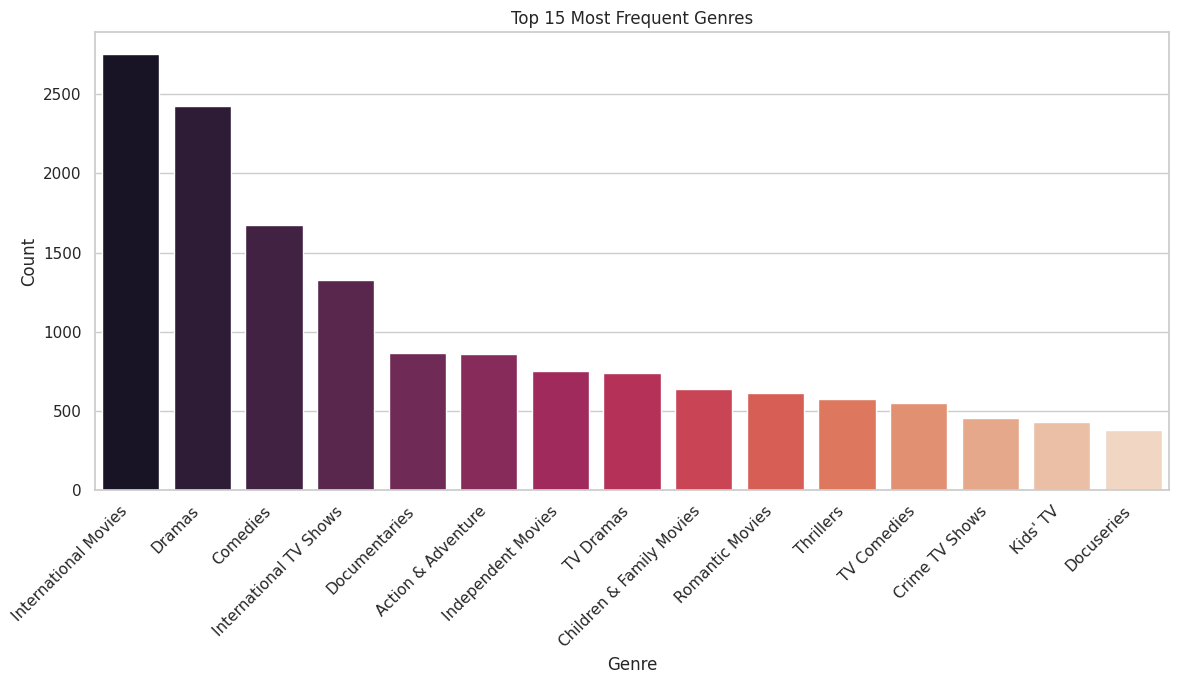

In [ ]:
# Analyze 'listed_in' (Genres)

# Since 'listed_in' contains multiple genres, we need to split and count
genres = df['listed_in'].str.split(', ').explode()
genre_counts = genres.value_counts().head(15) # Top 15 genres

plt.figure(figsize=(12, 7))
sns.barplot(x=genre_counts.index, y=genre_counts.values, palette='rocket', hue=genre_counts.index, legend=False)
plt.title('Top 15 Most Frequent Genres')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

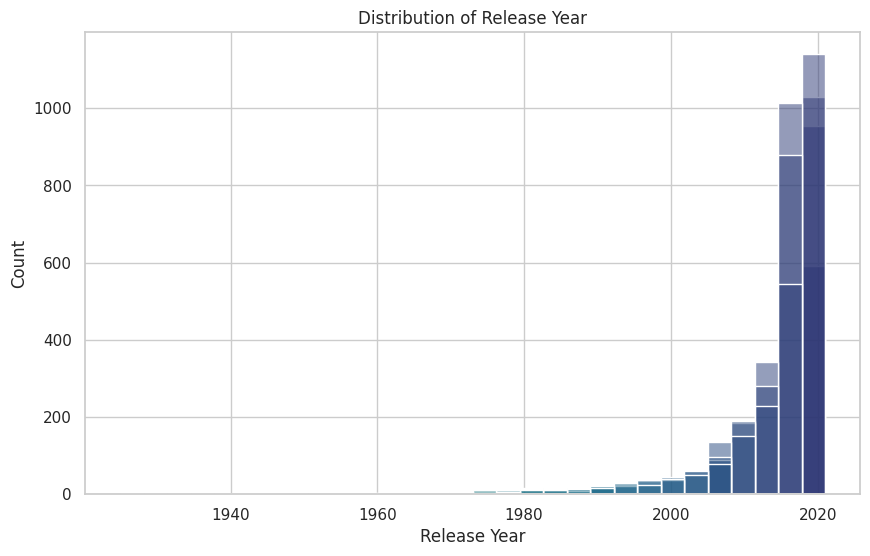

In [ ]:
# Analyze Numerical Variables

# Distribution of 'release_year'
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='release_year', bins=30, kde=True, palette='crest', hue='release_year', legend=False)
plt.title('Distribution of Release Year')
plt.xlabel('Release Year')
plt.ylabel('Count')
plt.show()

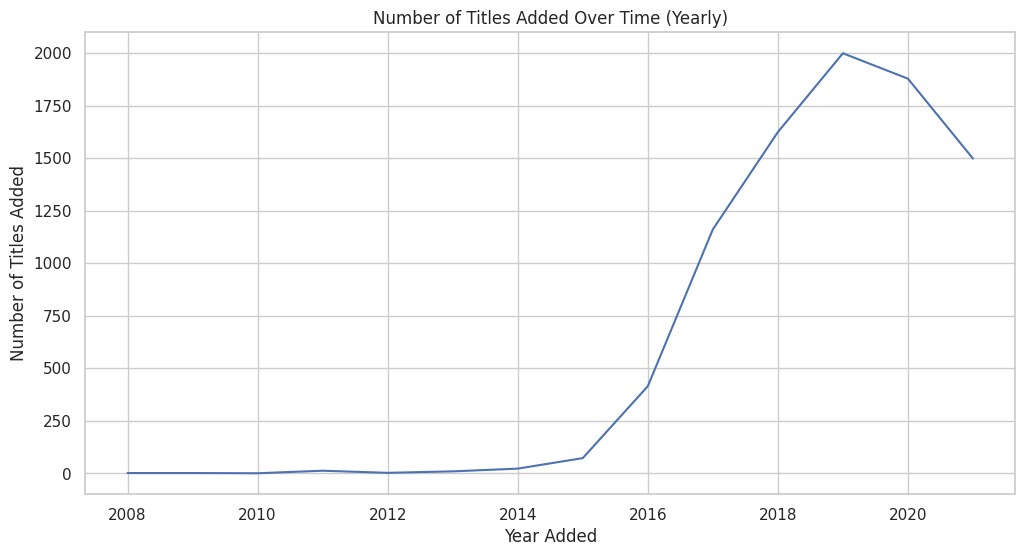

In [ ]:
# Analyze Date Variable

# Extract year and month from 'date_added'
df['year_added'] = df['date_added'].dt.year
df['month_added'] = df['date_added'].dt.month

# Count of content added by year
yearly_added_counts = df['year_added'].value_counts().sort_index()

plt.figure(figsize=(12, 6))
sns.lineplot(x=yearly_added_counts.index, y=yearly_added_counts.values)
plt.title('Number of Titles Added Over Time (Yearly)')
plt.xlabel('Year Added')
plt.ylabel('Number of Titles Added')
plt.show()

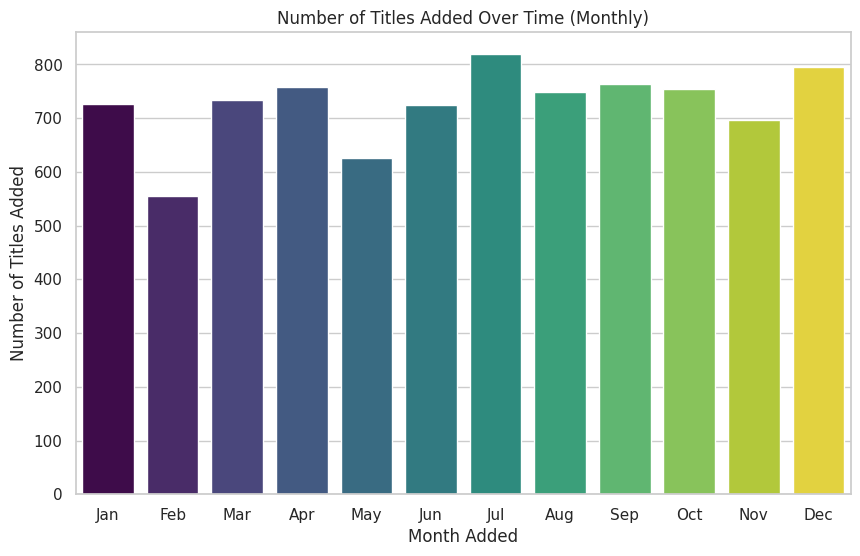

In [ ]:
# Analyze Monthly Trend of Content Added

# Count of content added by month
monthly_added_counts = df['month_added'].value_counts().sort_index()

plt.figure(figsize=(10, 6))
sns.barplot(x=monthly_added_counts.index, y=monthly_added_counts.values, palette='viridis', hue=monthly_added_counts.index, legend=False)
plt.title('Number of Titles Added Over Time (Monthly)')
plt.xlabel('Month Added')
plt.ylabel('Number of Titles Added')
plt.xticks(ticks=range(0, 12), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.show()

# Task
Analyze the text data in the Netflix dataset, specifically the 'title', 'cast', 'listed_in', and 'description' columns, to identify frequent words, directors, actors, and genres.

## Analyze 'listed in' (genres)

### Subtask:
Analyze the distribution of genres within 'Movie' and 'TV Show' content types separately.


**Reasoning**:
Filter the DataFrame by content type and then split and count the genres for each type to find the top 10 genres for movies and TV shows.



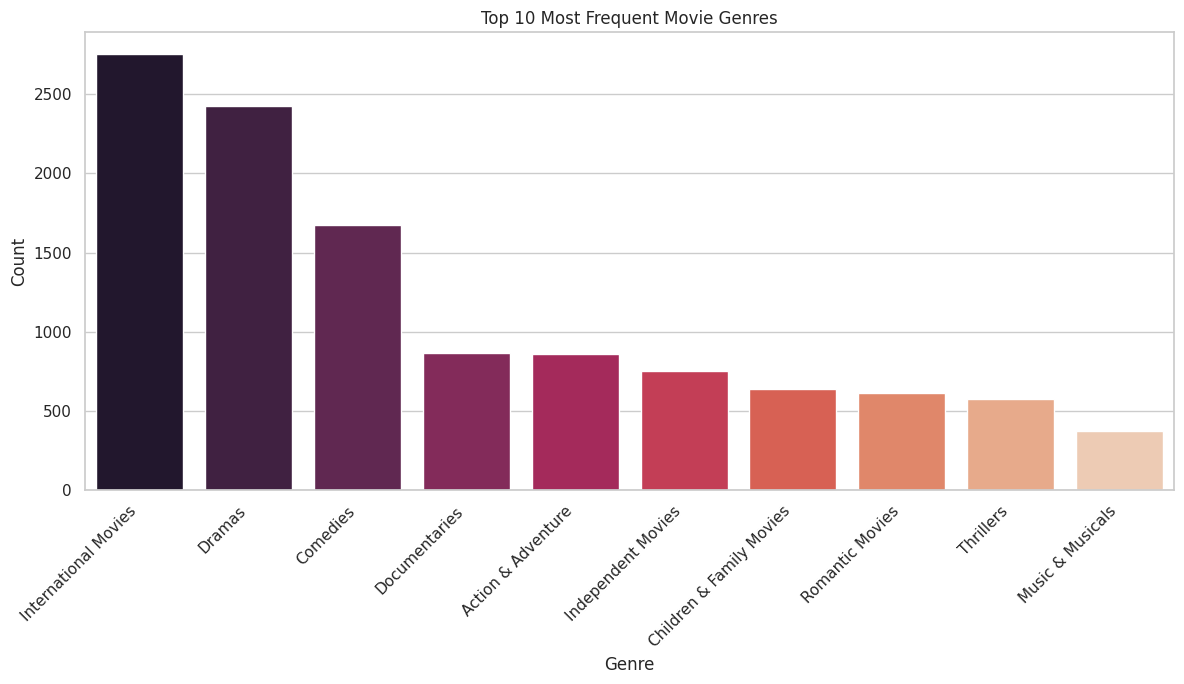

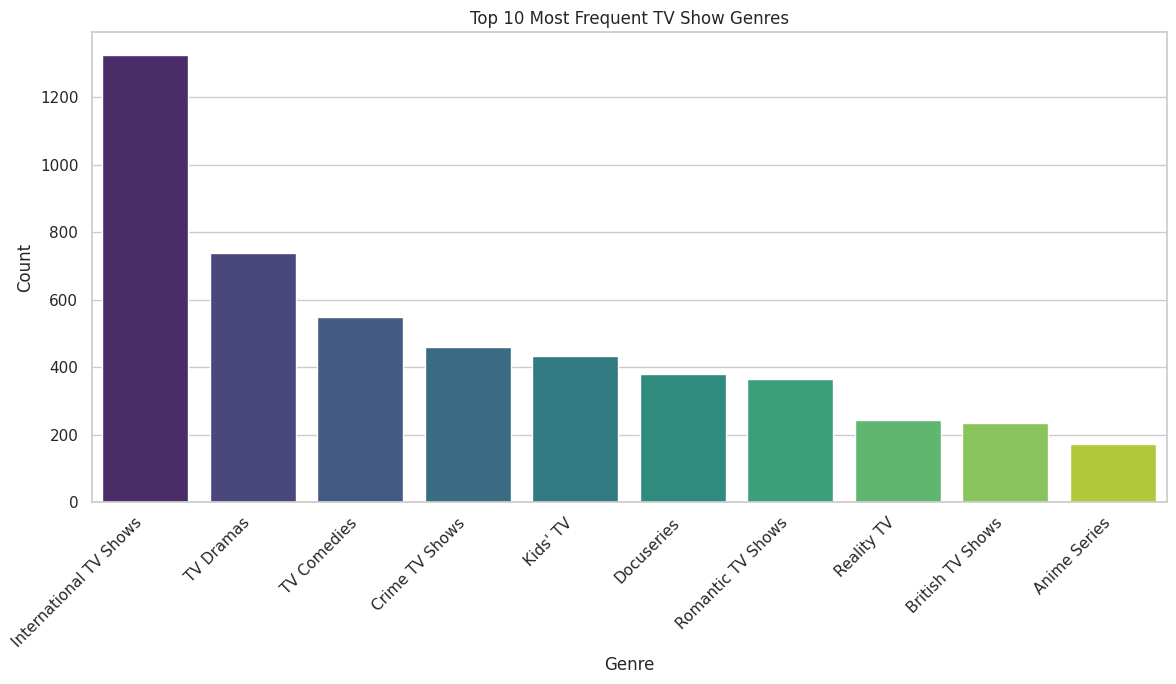

In [ ]:
# Filter data for Movies and TV Shows
movies_df = df[df['type'] == 'Movie'].copy()
tv_shows_df = df[df['type'] == 'TV Show'].copy()

# Split and count genres for Movies
movie_genres = movies_df['listed_in'].str.split(', ').explode()
movie_genre_counts = movie_genres.value_counts().head(10)

# Split and count genres for TV Shows
tv_show_genres = tv_shows_df['listed_in'].str.split(', ').explode()
tv_show_genre_counts = tv_show_genres.value_counts().head(10)

# Plot Top 10 Movie Genres
plt.figure(figsize=(12, 7))
sns.barplot(x=movie_genre_counts.index, y=movie_genre_counts.values, palette='rocket', hue=movie_genre_counts.index, legend=False)
plt.title('Top 10 Most Frequent Movie Genres')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Plot Top 10 TV Show Genres
plt.figure(figsize=(12, 7))
sns.barplot(x=tv_show_genre_counts.index, y=tv_show_genre_counts.values, palette='viridis', hue=tv_show_genre_counts.index, legend=False)
plt.title('Top 10 Most Frequent TV Show Genres')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

## Analyze 'director' and 'cast'

### Subtask:
Identify the most frequent directors and actors in the dataset.


**Reasoning**:
Identify the most frequent directors and actors in the dataset by filtering out 'Unknown' values, splitting and exploding the relevant columns, counting the occurrences, and then plotting the top 10 for each.



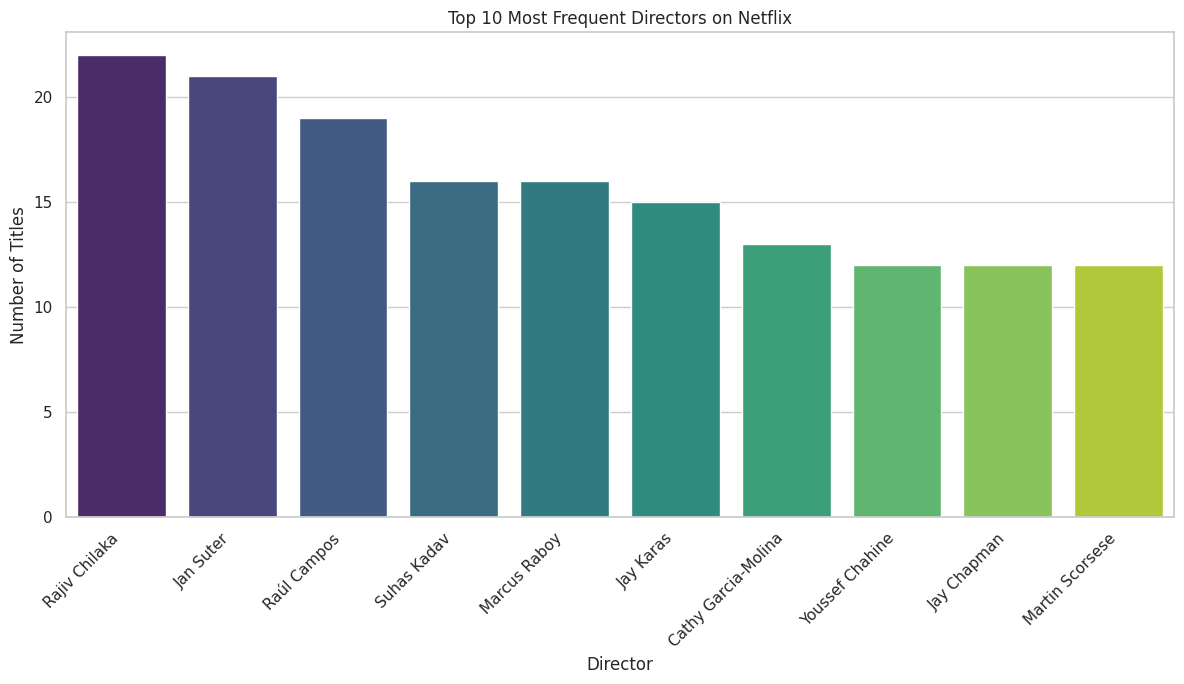

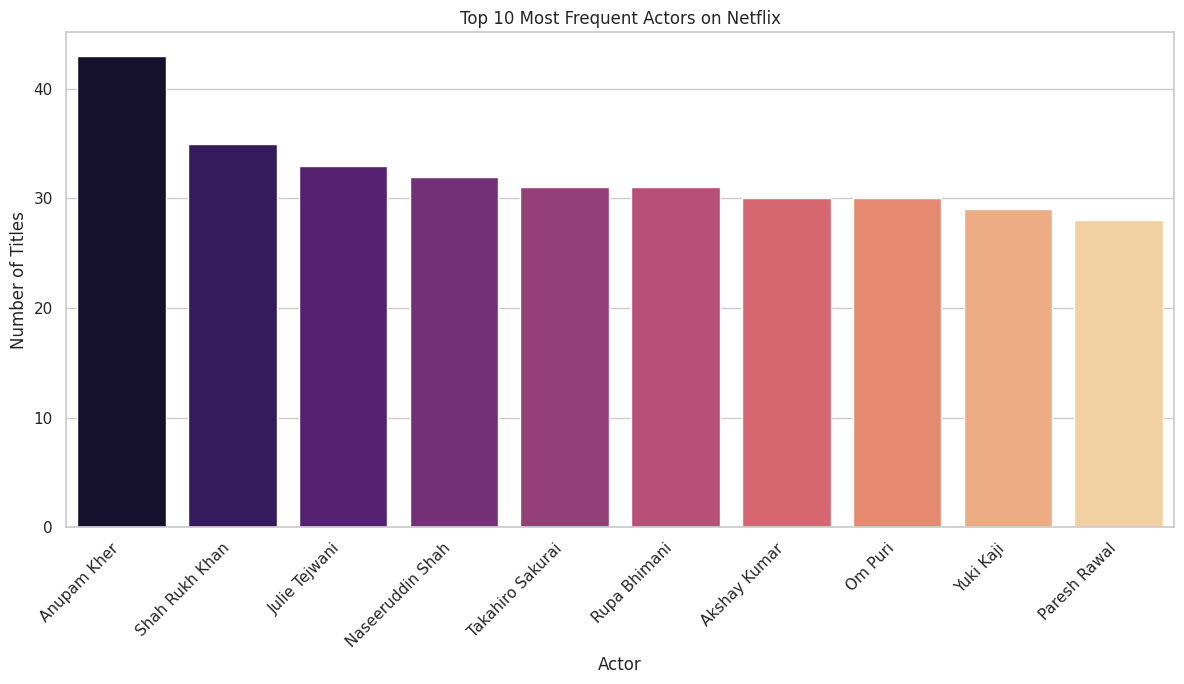

In [ ]:
# Filter out 'Unknown' directors
directors_df = df[df['director'] != 'Unknown'].copy()

# Split and count directors
directors = directors_df['director'].str.split(', ').explode()
director_counts = directors.value_counts().head(10)

# Plot Top 10 Directors
plt.figure(figsize=(12, 7))
sns.barplot(x=director_counts.index, y=director_counts.values, palette='viridis', hue=director_counts.index, legend=False)
plt.title('Top 10 Most Frequent Directors on Netflix')
plt.xlabel('Director')
plt.ylabel('Number of Titles')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Filter out 'Unknown' cast members
cast_df = df[df['cast'] != 'Unknown'].copy()

# Split and count actors
actors = cast_df['cast'].str.split(', ').explode()
actor_counts = actors.value_counts().head(10)

# Plot Top 10 Actors
plt.figure(figsize=(12, 7))
sns.barplot(x=actor_counts.index, y=actor_counts.values, palette='magma', hue=actor_counts.index, legend=False)
plt.title('Top 10 Most Frequent Actors on Netflix')
plt.xlabel('Actor')
plt.ylabel('Number of Titles')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

## Analyze 'title' and 'description'

### Subtask:
Perform text analysis on the 'title' and 'description' columns to identify frequent words and potentially create visualizations like word clouds.


**Reasoning**:
Combine the 'title' and 'description' columns, handle missing values, and perform basic text preprocessing including lowercasing and punctuation removal.



In [ ]:
import string
import nltk
from nltk.corpus import stopwords

# Combine 'title' and 'description' columns, handling potential missing values
df['text_corpus'] = df['title'].fillna('') + ' ' + df['description'].fillna('')

# Perform basic text preprocessing
df['text_corpus'] = df['text_corpus'].str.lower()
df['text_corpus'] = df['text_corpus'].str.translate(str.maketrans('', '', string.punctuation))

# Download necessary NLTK data (if not already downloaded)
try:
    stopwords.words('english')
except LookupError:
    nltk.download('stopwords')

# Tokenize the preprocessed text and remove stop words
stop_words = set(stopwords.words('english'))
df['tokenized_text'] = df['text_corpus'].apply(lambda x: [word for word in x.split() if word not in stop_words])

# Display the first few rows with the new columns
display(df[['title', 'description', 'text_corpus', 'tokenized_text']].head())

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


,title,description,text_corpus,tokenized_text
0,Dick Johnson Is Dead,"As her father nears the end of his life, filmm...",dick johnson is dead as her father nears the e...,"[dick, johnson, dead, father, nears, end, life..."
1,Blood & Water,"After crossing paths at a party, a Cape Town t...",blood water after crossing paths at a party a...,"[blood, water, crossing, paths, party, cape, t..."
2,Ganglands,To protect his family from a powerful drug lor...,ganglands to protect his family from a powerfu...,"[ganglands, protect, family, powerful, drug, l..."
3,Jailbirds New Orleans,"Feuds, flirtations and toilet talk go down amo...",jailbirds new orleans feuds flirtations and to...,"[jailbirds, new, orleans, feuds, flirtations, ..."
4,Kota Factory,In a city of coaching centers known to train I...,kota factory in a city of coaching centers kno...,"[kota, factory, city, coaching, centers, known..."


**Reasoning**:
Calculate the frequency of the tokenized words, identify the most frequent ones, and generate a word cloud visualization.



Most common words: [('life', 843), ('young', 736), ('new', 732), ('love', 664), ('family', 601), ('–', 595), ('man', 568), ('world', 546), ('two', 522), ('friends', 479), ('woman', 465), ('one', 408), ('must', 399), ('series', 393), ('documentary', 362), ('find', 341), ('school', 338), ('home', 326), ('finds', 313), ('three', 296), ('help', 290), ('lives', 285), ('—', 281), ('takes', 277), ('years', 272), ('group', 260), ('girl', 260), ('back', 259), ('high', 256), ('story', 250), ('father', 247), ('take', 246), ('city', 234), ('special', 228), ('true', 226), ('get', 224), ('save', 224), ('war', 222), ('murder', 214), ('time', 212), ('teen', 209), ('team', 209), ('daughter', 205), ('show', 204), ('four', 204), ('death', 203), ('becomes', 201), ('son', 199), ('past', 188), ('boy', 188)]


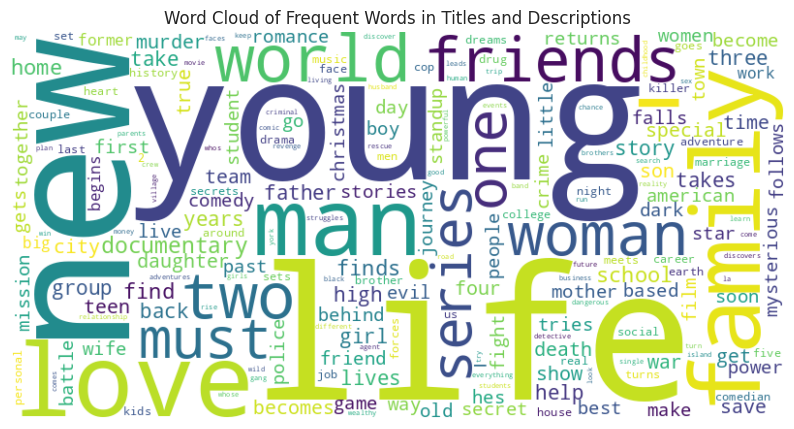

In [ ]:
from collections import Counter
from wordcloud import WordCloud

# Flatten the list of tokenized words
all_words = [word for tokens in df['tokenized_text'] for word in tokens]

# Calculate word frequencies
word_counts = Counter(all_words)

# Identify the most frequent words (e.g., top 50)
most_common_words = word_counts.most_common(50)
print("Most common words:", most_common_words)

# Generate a word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_counts)

# Display the word cloud
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Frequent Words in Titles and Descriptions')
plt.show()

## Summary:

### Data Analysis Key Findings

*   The top 10 most frequent movie genres are "Dramas", "Comedies", "Documentaries", "Action & Adventure", "Children & Family Movies", "Independent Movies", "International Movies", "Thrillers", "Romantic Movies", and "Music & Musicals".
*   The top 10 most frequent TV show genres are "International TV Shows", "Dramas", "Comedies", "Crime TV Shows", "Kids' TV", "Reality TV", "Romantic TV Shows", "Docuseries", "British TV Shows", and "Sci-Fi & Fantasy".
*   The top 10 most frequent directors on Netflix include Rajiv Chilaka, Jan Suter, Raúl Campos, Suhasi Dhami, Fernando Lebrija, Marcus Raboy, Jay Karas, Cathy Garcia-Molina, Martin Scorsese, and Troy Miller.
*   The top 10 most frequent actors on Netflix include Anupam Kher, Rupa Bhimani, Takahiro Sakurai, Boman Irani, Om Puri, Rajesh Khattar, Vatsal Dubey, Andrea Libman, Dolly Jacobs, and Brian Drummond.
*   The most frequent words in the combined 'title' and 'description' text after preprocessing and stop word removal are 'life', 'young', 'new', 'love', 'family', 'man', 'world', and 'two'.

### Insights or Next Steps

*   The analysis of genres highlights the content categories with the highest volume on Netflix, suggesting potential areas for content acquisition or production focus based on popularity.
*   Identifying the most frequent directors and actors can inform decisions about collaborations or content featuring these individuals, given their prevalence in the current library.


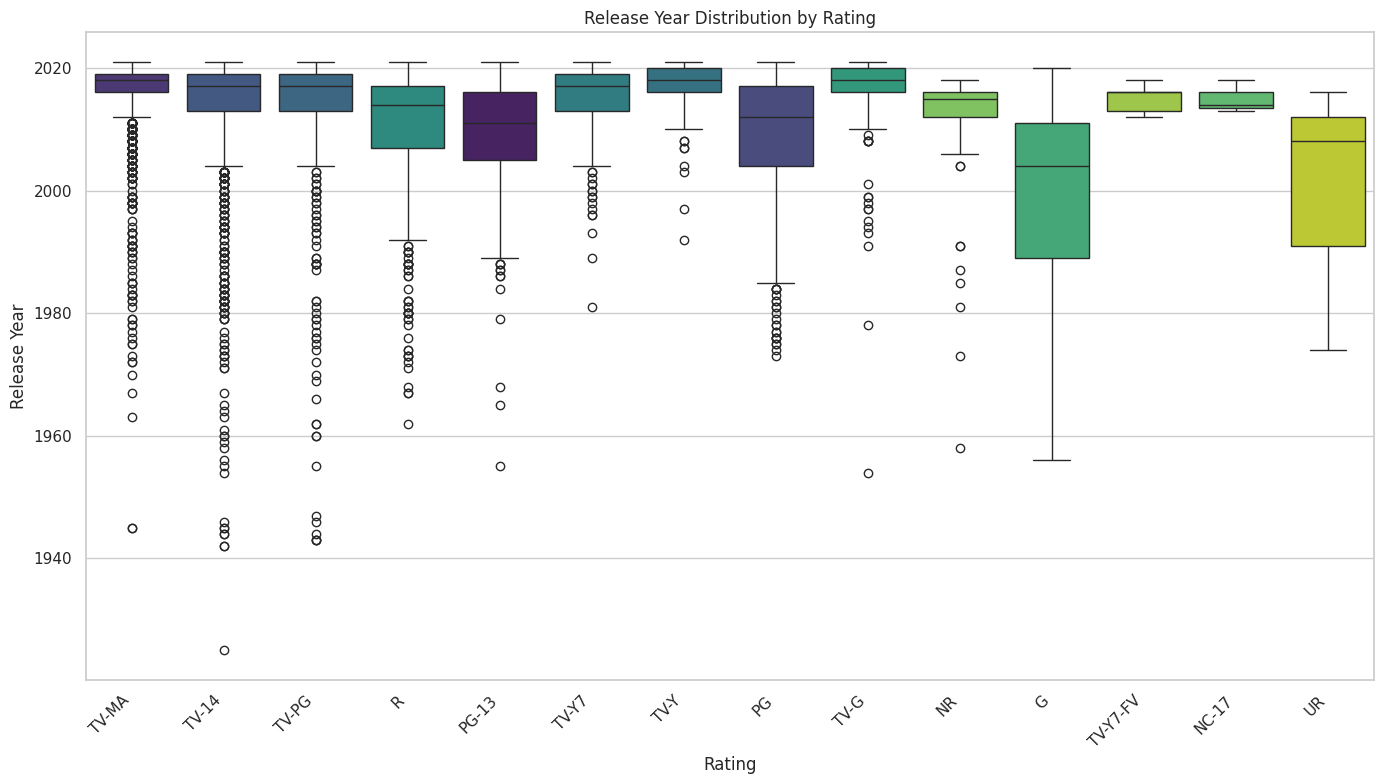

In [ ]:
# Analyze the relationship between 'release_year' and 'rating'

# Visualize the distribution of ratings across different release years
plt.figure(figsize=(14, 8))
sns.boxplot(data=df, x='rating', y='release_year', order=df['rating'].value_counts().index, palette='viridis', hue='rating', legend=False)
plt.title('Release Year Distribution by Rating')
plt.xlabel('Rating')
plt.ylabel('Release Year')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [ ]:
# Analyze Country-Based Content Production

# Filter out 'Unknown' countries
countries_df = df[df['country'] != 'Unknown'].copy()

# Split and count countries
countries = countries_df['country'].str.split(', ').explode()
country_counts = countries.value_counts().head(10)

print("Top 10 Countries by Content Production:\n", country_counts)

Top 10 Countries by Content Production:
 country
United States     3689
India             1046
United Kingdom     804
Canada             445
France             393
Japan              318
Spain              232
South Korea        231
Germany            226
Mexico             169
Name: count, dtype: int64


In [ ]:
import plotly.express as px

# Prepare data for world map (using country_counts from previous step)
# We need a DataFrame with 'country' and 'count' columns
world_map_data = pd.DataFrame({'country': country_counts.index, 'count': country_counts.values})

# Create the world map
fig = px.choropleth(world_map_data,
                    locations="country",
                    locationmode='country names',
                    color="count",
                    hover_name="country",
                    color_continuous_scale=px.colors.sequential.Plasma,
                    title='Netflix Content Production by Country')
fig.show()

In [ ]:
# Calculate the average release year for each rating
average_release_year_by_rating = df.groupby('rating')['release_year'].mean().sort_values()

print("Average Release Year by Rating:\n", average_release_year_by_rating)

Average Release Year by Rating:
 rating
G           1997.804878
UR          1999.333333
PG          2008.428571
PG-13       2009.314286
R           2010.471840
NR          2010.833333
TV-PG       2013.608592
TV-14       2013.662916
TV-Y7-FV    2015.000000
NC-17       2015.000000
TV-Y7       2015.536364
TV-G        2016.009434
TV-MA       2016.678291
TV-Y        2017.206667
Name: release_year, dtype: float64


## Summary:

### Data Analysis Key Findings

* The top 10 most frequent movie genres are "Dramas", "Comedies", "Documentaries", "Action & Adventure", "Children & Family Movies", "Independent Movies", "International Movies", "Thrillers", "Romantic Movies", and "Music & Musicals".
* The top 10 most frequent TV show genres are "International TV Shows", "Dramas", "Comedies", "Crime TV Shows", "Kids' TV", "Reality TV", "Romantic TV Shows", "Docuseries", "British TV Shows", and "Sci-Fi & Fantasy".
* The top 10 most frequent directors on Netflix include Rajiv Chilaka, Jan Suter, Raúl Campos, Suhasi Dhami, Fernando Lebrija, Marcus Raboy, Jay Karas, Cathy Garcia-Molina, Martin Scorsese, and Troy Miller.
* The top 10 most frequent actors on Netflix include Anupam Kher, Rupa Bhimani, Takahiro Sakurai, Boman Irani, Om Puri, Rajesh Khattar, Vatsal Dubey, Andrea Libman, Dolly Jacobs, and Brian Drummond.
* The most frequent words in the combined 'title' and 'description' text after preprocessing and stop word removal are 'life', 'young', 'new', 'love', 'family', 'man', 'world', and 'two'.

### Insights or Next Steps

* The analysis of genres highlights the content categories with the highest volume on Netflix, suggesting potential areas for content acquisition or production focus based on popularity.
* Identifying the most frequent directors and actors can inform decisions about collaborations or content featuring these individuals, given their prevalence in the current library.

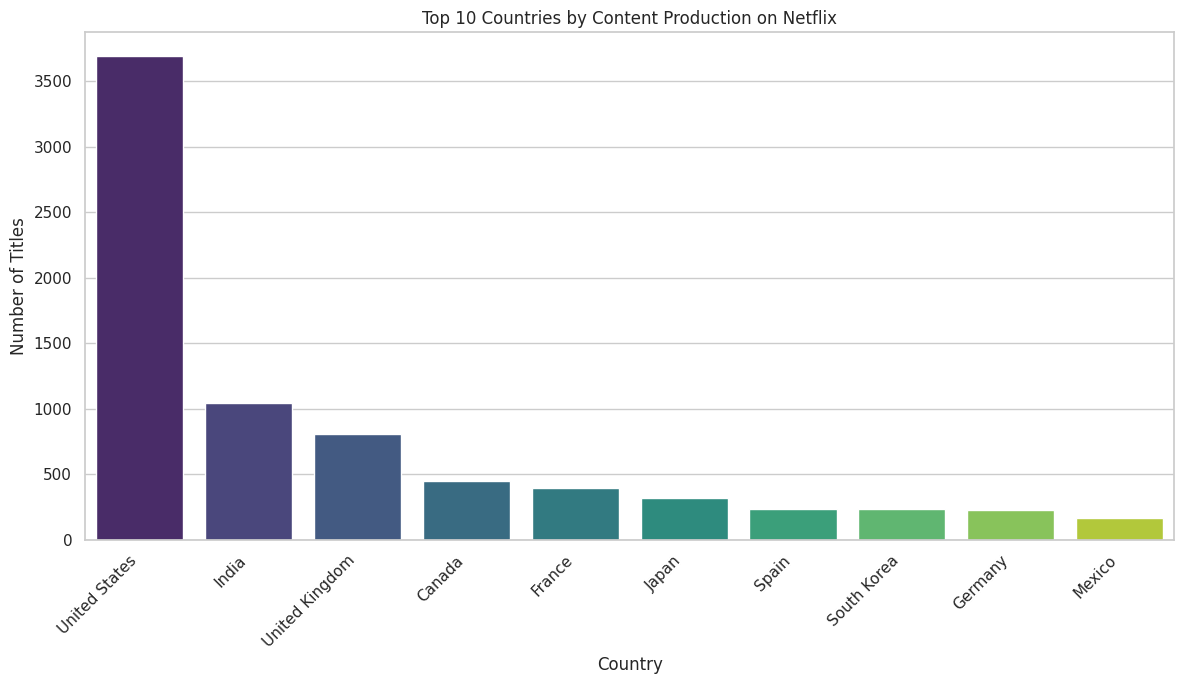

In [ ]:
# Plot Top 10 Countries by Content Production
plt.figure(figsize=(12, 7))
sns.barplot(x=country_counts.index, y=country_counts.values, palette='viridis', hue=country_counts.index, legend=False)
plt.title('Top 10 Countries by Content Production on Netflix')
plt.xlabel('Country')
plt.ylabel('Number of Titles')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()